<h1> RQ5 </h1>

In [84]:
#import libraries
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [2]:
#read json data into pandas datframe
df_events = pd.read_json ('/users/poojacj/Desktop/adm_hw2/events/events_England.json')

In [3]:
df_events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [4]:
#filter the event dataset on subEventName
df_events = df_events[df_events.subEventName == "Air duel"]

In [5]:
df_events.head(10)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
7,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",2499719,Duel,1631,1H,14.765321,10,177959189
8,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",2499719,Duel,1609,1H,14.765321,10,177961218
12,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",2499719,Duel,1631,1H,21.878309,10,177959191
13,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",2499719,Duel,1609,1H,22.551816,10,177959181
27,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",2499719,Duel,1631,1H,47.717508,10,177959210
28,1,Air duel,"[{'id': 701}, {'id': 1802}]",7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",2499719,Duel,1609,1H,48.265872,10,177959188
60,1,Air duel,"[{'id': 701}, {'id': 1802}]",8488,"[{'y': 41, 'x': 93}, {'y': 52, 'x': 85}]",2499719,Duel,1631,1H,178.239539,10,177959246
61,1,Air duel,"[{'id': 703}, {'id': 1801}]",120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",2499719,Duel,1609,1H,178.317724,10,177959224
89,1,Air duel,"[{'id': 701}, {'id': 1802}]",49876,"[{'y': 48, 'x': 4}, {'y': 48, 'x': 4}]",2499719,Duel,1609,1H,253.893086,10,177959248
90,1,Air duel,"[{'id': 703}, {'id': 1801}]",14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",2499719,Duel,1631,1H,254.036308,10,177959279


In [6]:
#drop unnecessary columns
df_events = df_events.drop(['positions','matchPeriod','eventSec'], axis = 1)

In [7]:
df_events

,eventId,subEventName,tags,playerId,matchId,eventName,teamId,subEventId,id
7,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,2499719,Duel,1631,10,177959189
8,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,2499719,Duel,1609,10,177961218
12,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,2499719,Duel,1631,10,177959191
13,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,2499719,Duel,1609,10,177959181
27,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,2499719,Duel,1631,10,177959210
...,...,...,...,...,...,...,...,...,...
642949,1,Air duel,"[{'id': 703}, {'id': 1801}]",37725,2500098,Duel,1633,10,251596054
643053,1,Air duel,"[{'id': 701}, {'id': 1802}]",56,2500098,Duel,1623,10,251596358
643054,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,2500098,Duel,1633,10,251596102
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,2500098,Duel,1623,10,251596410


In [11]:
#add another column in the dataframe called "AirDuelWon" as 1 if tags = 703 otherwise 0
filtered_data = []
for i,x in df_events['tags'].items():
    for j in x:
        if j['id'] == 703:
            filtered_data.append({'index': i, 'tags': x, 'AirDuelWon': int(1)})
        elif (j['id'] == 701) | (j['id'] == 702) :
            filtered_data.append({'index': i, 'tags': x, 'AirDuelWon': int(0)})

In [12]:
filtered_data

[{'index': 7, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 8, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 12, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 13, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 27, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 28, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 60, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 61, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 89, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 90, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 98, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 99, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 131, 'tags': [{'id': 703}, {'id': 1801}], 'AirDuelWon': 1},
 {'index': 132, 'tags': [{'id': 701}, {'id': 1802}], 'AirDuelWon': 0},
 {'index': 169, 'tag

In [13]:
filtered_data = pd.DataFrame(filtered_data)

In [14]:
filtered_data

,index,tags,AirDuelWon
0,7,"[{'id': 701}, {'id': 1802}]",0
1,8,"[{'id': 703}, {'id': 1801}]",1
2,12,"[{'id': 703}, {'id': 1801}]",1
3,13,"[{'id': 701}, {'id': 1802}]",0
4,27,"[{'id': 703}, {'id': 1801}]",1
...,...,...,...
37755,642949,"[{'id': 703}, {'id': 1801}]",1
37756,643053,"[{'id': 701}, {'id': 1802}]",0
37757,643054,"[{'id': 703}, {'id': 1801}]",1
37758,643147,"[{'id': 701}, {'id': 1802}]",0


In [15]:
#setting the index 
filtered_data = filtered_data.set_index('index')

In [16]:
filtered_data

,tags,AirDuelWon
index,,
7,"[{'id': 701}, {'id': 1802}]",0
8,"[{'id': 703}, {'id': 1801}]",1
12,"[{'id': 703}, {'id': 1801}]",1
13,"[{'id': 701}, {'id': 1802}]",0
27,"[{'id': 703}, {'id': 1801}]",1
...,...,...
642949,"[{'id': 703}, {'id': 1801}]",1
643053,"[{'id': 701}, {'id': 1802}]",0
643054,"[{'id': 703}, {'id': 1801}]",1


In [17]:
#merge events and filtered dataframes on index
df_events = df_events.merge(filtered_data, left_index=True, right_index=True)

In [18]:
df_events

,eventId,subEventName,tags_x,playerId,matchId,eventName,teamId,subEventId,id,tags_y,AirDuelWon
7,1,Air duel,"[{'id': 701}, {'id': 1802}]",8013,2499719,Duel,1631,10,177959189,"[{'id': 701}, {'id': 1802}]",0
8,1,Air duel,"[{'id': 703}, {'id': 1801}]",0,2499719,Duel,1609,10,177961218,"[{'id': 703}, {'id': 1801}]",1
12,1,Air duel,"[{'id': 703}, {'id': 1801}]",8653,2499719,Duel,1631,10,177959191,"[{'id': 703}, {'id': 1801}]",1
13,1,Air duel,"[{'id': 701}, {'id': 1802}]",25413,2499719,Duel,1609,10,177959181,"[{'id': 701}, {'id': 1802}]",0
27,1,Air duel,"[{'id': 703}, {'id': 1801}]",192748,2499719,Duel,1631,10,177959210,"[{'id': 703}, {'id': 1801}]",1
...,...,...,...,...,...,...,...,...,...,...,...
642949,1,Air duel,"[{'id': 703}, {'id': 1801}]",37725,2500098,Duel,1633,10,251596054,"[{'id': 703}, {'id': 1801}]",1
643053,1,Air duel,"[{'id': 701}, {'id': 1802}]",56,2500098,Duel,1623,10,251596358,"[{'id': 701}, {'id': 1802}]",0
643054,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,2500098,Duel,1633,10,251596102,"[{'id': 703}, {'id': 1801}]",1
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,2500098,Duel,1623,10,251596410,"[{'id': 701}, {'id': 1802}]",0


In [19]:
#drop unnecessary columns
df_events = df_events.drop(['eventId','subEventName','tags_x','eventName','subEventId','tags_y'], axis=1)

In [20]:
df_events

,playerId,matchId,teamId,id,AirDuelWon
7,8013,2499719,1631,177959189,0
8,0,2499719,1609,177961218,1
12,8653,2499719,1631,177959191,1
13,25413,2499719,1609,177959181,0
27,192748,2499719,1631,177959210,1
...,...,...,...,...,...
642949,37725,2500098,1633,251596054,1
643053,56,2500098,1623,251596358,0
643054,8313,2500098,1633,251596102,1
643147,7919,2500098,1623,251596410,0


In [43]:
df_groupby = df_events.groupby('playerId').agg({'AirDuelWon':['sum', 'count']})

In [44]:
df_groupby.columns=['_'.join(col).strip() for col in df_groupby.columns.values]

In [45]:
#reset the index
df_result = df_groupby.reset_index() 

In [46]:
df_result

,playerId,AirDuelWon_sum,AirDuelWon_count
0,0,1061,2972
1,36,23,55
2,38,11,19
3,48,137,213
4,54,15,52
...,...,...,...
487,447538,0,1
488,447812,8,15
489,448708,1,1
490,486252,10,21


In [47]:
#read json data into pandas datframe
df_players = pd.read_json ('/users/poojacj/Desktop/adm_hw2/players.json')[['shortName','wyId','height']]

In [48]:
df_players

,shortName,wyId,height
0,H. Tekin,32777,187
1,M. Sarr,393228,182
2,O. Mandanda,393230,176
3,A. N'Diaye,32793,187
4,I. Konat\u00e9,393247,192
...,...,...,...
3598,A. Ma\u00e2loul,120839,175
3599,C. C\u00e1ceda,114736,183
3600,M. Araujo,114908,179
3601,A. Tagnaouti,285583,182


In [49]:
#rename columns to match the playerId in events dataset to wyId in players dataset
df_players.columns = ['PlayerName','playerId','height']

In [50]:
#left join the events and players datasets
df_merge_col = pd.merge(df_result, df_players, on='playerId', how='left')

In [51]:
df_merge_col

,playerId,AirDuelWon_sum,AirDuelWon_count,PlayerName,height
0,0,1061,2972,NaN,NaN
1,36,23,55,T. Alderweireld,187.0
2,38,11,19,D. Blind,180.0
3,48,137,213,J. Vertonghen,189.0
4,54,15,52,C. Eriksen,180.0
...,...,...,...,...,...
487,447538,0,1,M. Obafemi,169.0
488,447812,8,15,T. Edwards,175.0
489,448708,1,1,H. Barnes,174.0
490,486252,10,21,A. Wan-Bissaka,183.0


In [59]:
df_merge_col.columns = ['PlayerId','AirDuelsWon','AirDuelsAttempted','PlayerName','Height(in cm)']

In [60]:
df_merge_col.isna().sum()

PlayerId             0
AirDuelsWon          0
AirDuelsAttempted    0
PlayerName           0
Height(in cm)        0
dtype: int64

In [63]:
#drop the rows with empty player name and height
df_final = df_merge_col.dropna(axis = 0, how ='any')

In [64]:
df_final

,PlayerId,AirDuelsWon,AirDuelsAttempted,PlayerName,Height(in cm)
1,36,23,55,T. Alderweireld,187.0
2,38,11,19,D. Blind,180.0
3,48,137,213,J. Vertonghen,189.0
4,54,15,52,C. Eriksen,180.0
5,56,3,8,D. Klaassen,179.0
...,...,...,...,...,...
487,447538,0,1,M. Obafemi,169.0
488,447812,8,15,T. Edwards,175.0
489,448708,1,1,H. Barnes,174.0
490,486252,10,21,A. Wan-Bissaka,183.0


In [67]:
df_final["ratio"] = df_final["AirDuelsWon"] / df_final["AirDuelsAttempted"]

In [68]:
#sort the columns in descending order of ratio
df_final = df_final.sort_values(by='ratio', ascending=False)

In [69]:
df_final

,PlayerId,AirDuelsWon,AirDuelsAttempted,PlayerName,Height(in cm),ratio
47,3662,2,2,C. Bravo,184.0,1.0
284,25415,3,3,J. Pied,173.0,1.0
357,77502,2,2,T. Heaton,188.0,1.0
150,8391,2,2,J. Speroni,186.0,1.0
154,8425,14,14,W. Hennessey,198.0,1.0
...,...,...,...,...,...,...
470,397098,0,1,R. Nelson,176.0,0.0
451,297733,0,2,S. McQueen,181.0,0.0
31,3348,0,7,Deulofeu,177.0,0.0
29,3326,0,11,Jes\u00e9 Rodr\u00edguez,178.0,0.0


Text(0, 0.5, 'Ratio of air duels won to air duels attempted')

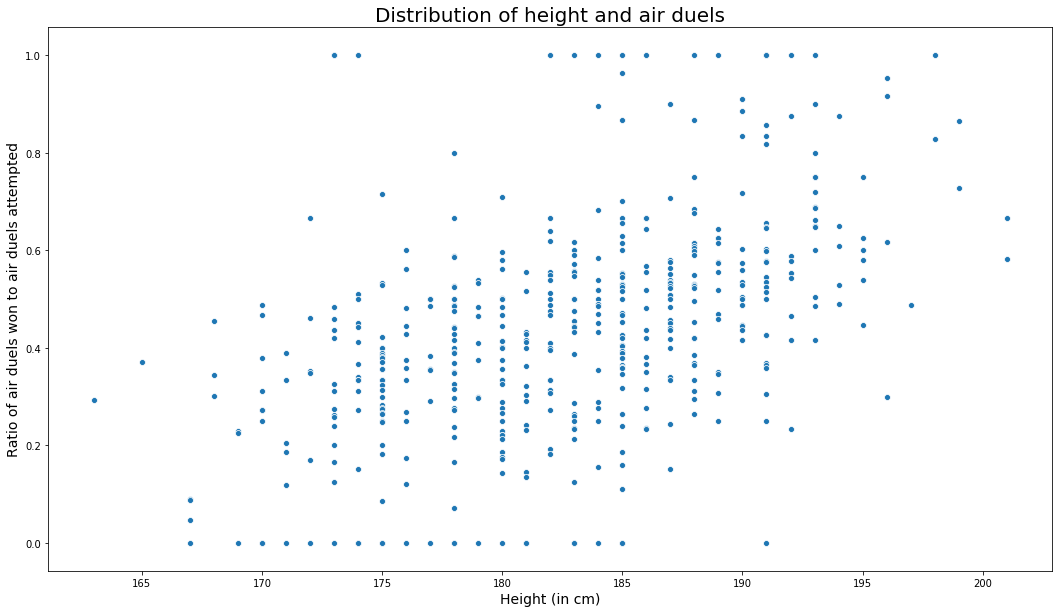

In [96]:
plt.figure(figsize=(18,10))
#add scatterplot
chart = sns.scatterplot(
    data=df_final,
    x ='Height(in cm)',
    y='ratio'
)
# make changes to x and y labels
chart.axes.set_title("Distribution of height and air duels",
                    fontsize=20)
chart.set_xlabel("Height (in cm)", 
                fontsize=14)
chart.set_ylabel("Ratio of air duels won to air duels attempted",
                fontsize=14)

In [97]:
# output_file('example.html')

# p = figure()
# p.circle(x='Height(in cm)', y='ratio',
#          source=source,
#          size=10, color='green')
# p.title.text = 'Distribution of height and air duels'
# p.xaxis.axis_label = 'Height(in cm)'
# p.yaxis.axis_label = 'Ratio of air duels won to air duels attempted'

# # hover = HoverTool()
# # hover.tooltips=[
# #     ('Attack Date', '@MSNDATE'),
# #     ('Attacking Aircraft', '@AC_ATTACKING'),
# #     ('Tons of Munitions', '@TOTAL_TONS'),
# #     ('Type of Aircraft', '@AIRCRAFT_NAME')
# # ]

# # p.add_tools(hover)

# show(p)